In [30]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [31]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.cifar10.load_data()
train_images=train_images/255.0
test_images=test_images/255.0
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

<function matplotlib.pyplot.show(close=None, block=None)>

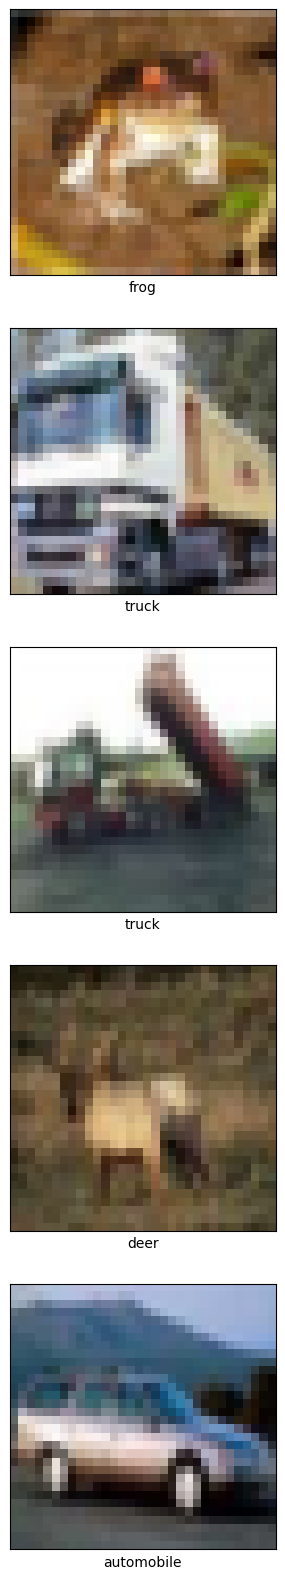

In [32]:
plt.figure(figsize=(10,20))
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show

In [33]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 492,298 (1.88 MB)

 Trainable params: 492,298 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history=model.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 42ms/step - accuracy: 0.3132 - loss: 1.7994 - val_accuracy: 0.5661 - val_loss: 1.2015
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5829 - loss: 1.1489 - val_accuracy: 0.6389 - val_loss: 1.0158
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6643 - loss: 0.9385 - val_accuracy: 0.6688 - val_loss: 0.9607
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7123 - loss: 0.8053 - val_accuracy: 0.6992 - val_loss: 0.8617
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7534 - loss: 0.6955 - val_accuracy: 0.7170 - val_loss: 0.8317
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7817 - loss: 0.6218 - val_accuracy: 0.6935 - val_loss: 0.9571
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.8056 - loss: 0.5496 - val_accuracy: 0.7125 - val_loss: 0.8816
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.8267 -

In [36]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"Test acuracy:{test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7331 - loss: 0.9088
Test acuracy:0.7275000214576721


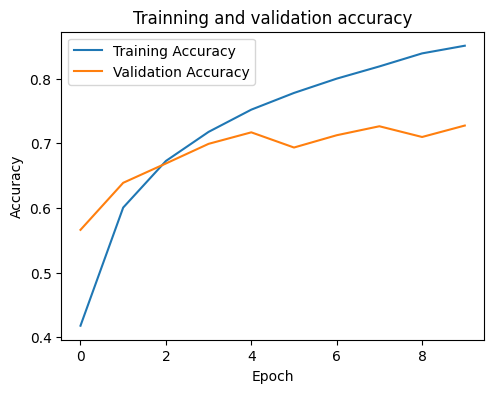

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Trainning and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

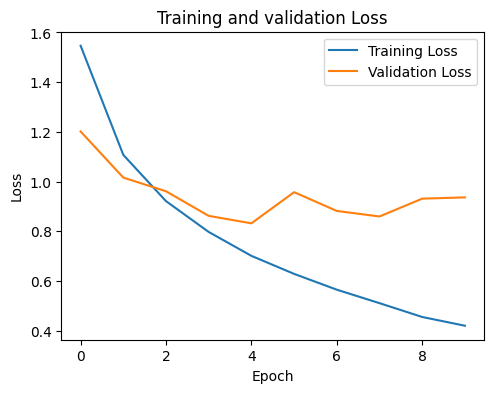

In [38]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
predictions=model.predict(test_images[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


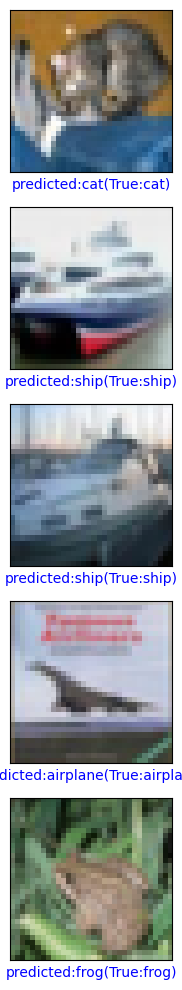

In [40]:
def plot_image(i,predictions_array,true_label,img,class_names):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    predicted_label=np.argmax(predictions_array)
    color='blue' if predicted_label==true_label else 'red'
    plt.xlabel(f"predicted:{class_names[predicted_label]}(True:{class_names[true_label[0]]})",color=color)
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,1,i+1)
    plot_image(i,predictions,test_labels,test_images,class_names)
plt.tight_layout()
plt.show()